# **Ciência de Dados Aplicado à Finanças.**


**prof: Sérgio Assunção Monteiro, D.Sc**

**linkedin:** https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

**lattes:** http://lattes.cnpq.br/9489191035734025

# **Aquisição e Exploração de Dados**

In [ ]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 2.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 
import requests

In [ ]:
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [ ]:
codigos = df_nomes_tickers['CÓDIGO']
codigo_especifico = codigos[1]
print(codigo_especifico)

ABUD34


In [ ]:
codigo_especifico
codigo = [str(codigo_especifico+'.SA')]
codigo

['ABUD34.SA']

In [ ]:
df = yf.download(codigo[0], 
                 start='2021-08-01', 
                 end='2021-10-01',
                 group_by="ticker"); # ";" serve para não exibir os dados

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02 00:00:00-03:00,54.500000,54.500000,53.950001,53.950001,53.474136,165
2021-08-03 00:00:00-03:00,53.950001,54.599998,53.939999,54.250000,53.771488,1289
2021-08-04 00:00:00-03:00,54.099998,54.099998,53.290001,53.290001,52.819958,223
2021-08-05 00:00:00-03:00,53.150002,53.750000,52.900002,53.650002,53.176785,110
2021-08-06 00:00:00-03:00,54.910000,54.910000,53.700001,53.849998,53.375015,567


**Dicionário das variáveis:**

*   Date – dia.
*   Open – O valor de abertura da ação no dia.
*   High – Valor máximo que a ação chegou no dia.
*   Low – O valor mínimo da ação no dia.
*   Close – Preço de fechamento no dia.
*   Adj Close – Preço de fechamento do dia ajustado.
*   Volume – Volume negociado no dia.

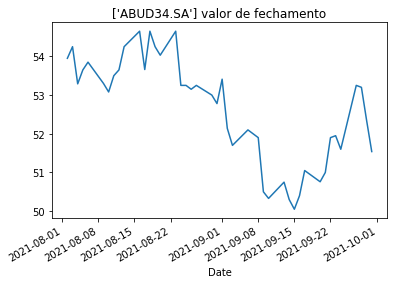

In [ ]:
df['Close'].plot(title = str(codigo)+ " valor de fechamento")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


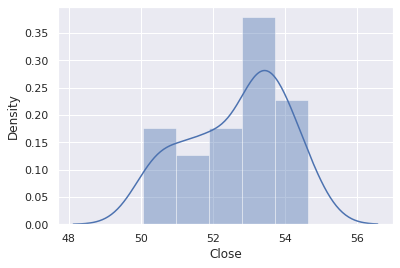

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(df['Close'])

In [ ]:
df['Close'].describe()

count    43.000000
mean     52.640000
std       1.358382
min      50.049999
25%      51.650000
50%      53.150002
75%      53.650002
max      54.650002
Name: Close, dtype: float64

In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
dados = [go.Scatter(x=df.index, y=df['Close'])]
py.iplot(dados)

# **Médias Móveis**

In [ ]:
# Média simples de 3 dias
df['MM_3'] = df.Close.rolling(window=3).mean()

# Média simples de 9 dias
df['MM_9'] = df.Close.rolling(window=9).mean()

# Média simples de 15 dias
df['MM_15'] = df.Close.rolling(window=15).mean()

fechamento = go.Scatter(x=df.index,
                   y=df.Close,
                   name = "ABUD34 Close",
                   line = dict(color = '#330000'),
                   opacity = 0.8)

MM_3 = go.Scatter(x=df.index,
                  y=df['MM_3'],
                  name = "Média Móvel 3 Períodos",
                  line = dict(color = '#FF8000'),
                  opacity = 0.8)

MM_9 = go.Scatter(x=df.index,
                  y=df['MM_9'],
                  name = "Média Móvel 9 Períodos",
                  line = dict(color = '#B2FF66'),
                  opacity = 0.8)

MM_15 = go.Scatter(x=df.index,
                   y=df['MM_15'],
                   name = "Média Móvel 15 Períodos",
                   line = dict(color = '#FF00FF'),
                   opacity = 0.8)

data = [fechamento, MM_3, MM_9, MM_15]

py.iplot(data)

In [ ]:
# D Média simples de 3 dias
df['DMM_3'] = df.Close.rolling(window=3).std()
DMM_3 = go.Scatter(x=df.index,
                  y=df['DMM_3'],
                  name = "D Média Móvel 3 Períodos",
                  line = dict(color = '#FF8000'),
                  opacity = 0.8)
data2 = [DMM_3]

py.iplot(data2)

# **Visualização de Dados: Candle Sticks**


Ver o pacote: https://github.com/matplotlib/mplfinance

Sugestão de leitura: https://www.infomoney.com.br/onde-investir/confuso-entre-os-candlestick-conheca-os-principais-padroes-de-reversao/

In [ ]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 1.9 MB/s 


In [ ]:
import mplfinance as mpf

In [ ]:
import pandas as pd
import yfinance as yf 
import matplotlib.pyplot as plt

In [ ]:
codigo = ['BTC-USD']
df = yf.download(codigo[0], 
                 start='2021-09-01', 
                 end='2021-11-01',
                 group_by="ticker"); # ";" serve para não exibir os dados

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01 00:00:00+00:00,47099.773438,49111.089844,46562.437500,48847.027344,48847.027344,39139399125
2021-09-02 00:00:00+00:00,48807.847656,50343.421875,48652.320312,49327.722656,49327.722656,39508070319
2021-09-03 00:00:00+00:00,49288.250000,50982.273438,48386.085938,50025.375000,50025.375000,43206179619
2021-09-04 00:00:00+00:00,50009.324219,50545.582031,49548.781250,49944.625000,49944.625000,37471327794
2021-09-05 00:00:00+00:00,49937.859375,51868.679688,49538.597656,51753.410156,51753.410156,30322676319


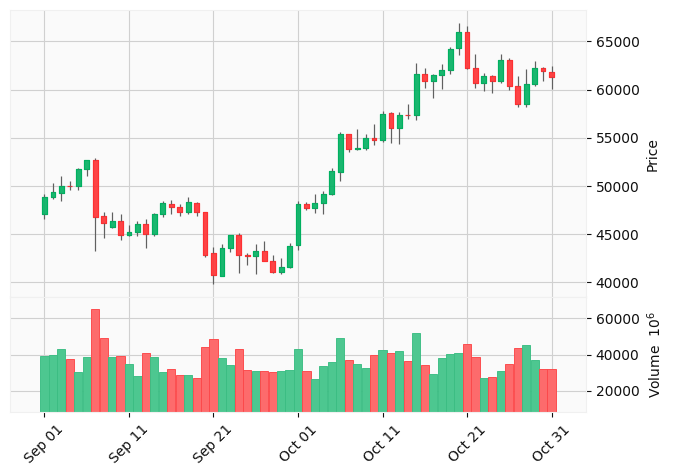

In [ ]:
mpf.plot(df, type="candle", volume=True, style="yahoo")

# **Comparar Várias Ações**

In [ ]:
tickers = ['MMMC34.SA', 'ABUD34.SA', 'A1BB34.SA', 'ABTT34.SA', 'ABBV34.SA']

df = yf.download(tickers, 
                 start='2021-08-01', 
                 end='2021-10-01',
                 group_by="ticker");

[*********************100%***********************]  5 of 5 completed


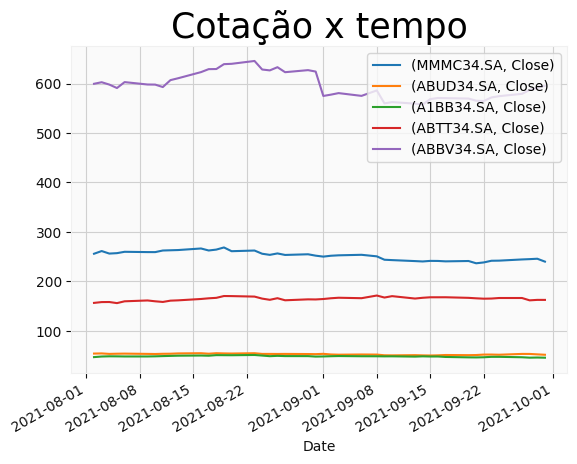

<Figure size 640x480 with 0 Axes>

In [ ]:
for acao in tickers:
  serie = df[acao, 'Close']
  serie.plot()

plt.title("Cotação x tempo", fontsize = 25)
# Legendas
#plt.legend(loc='lower left')
#plt.legend(loc=2)
plt.legend(loc='best')
plt.figure();

# **Criptomoedas**

In [ ]:
pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 2.0 MB/s 
     |████████████████████████████████| 83 kB 1.6 MB/s 
     |████████████████████████████████| 112 kB 14.5 MB/s 
     |████████████████████████████████| 140 kB 23.1 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=cf56cc2f17c221071b3948a610f8ca59c84208c4f32b2e3d7039e640c0085a03
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=9510ba0227ddc3f97df9c218fb0140bc80880d27d885e847087ee279ca4dbc1d
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=31d74de4d0e01f926b9fa028d8e1ed2f2821500eb700e5660df33

In [ ]:
from yahoo_fin.stock_info import get_data

In [ ]:
from datetime import datetime

# get data until today
end = datetime.today()

# get data two years from today
start = datetime(end.year-2, end.month, end.day)

btc_trend = get_data("BTC-EUR", start_date=start, end_date=end,
                        index_as_date = True, interval="1d")

eth_trend = get_data("ETH-EUR", start_date=start, end_date=end,
                        index_as_date = True, interval="1d")

bch_trend = get_data("BCH-EUR", start_date=start, end_date=end,
                        index_as_date = True, interval="1d")

ltc_trend = get_data("LTC-EUR", start_date=start, end_date=end,
                        index_as_date = True, interval="1d")

xrp_trend = get_data("XRP-EUR", start_date=start, end_date=end,
                        index_as_date = True, interval="1d")

doge_trend = get_data("DOGE-EUR", start_date=start, end_date=end,
                        index_as_date = True, interval="1d")

In [ ]:
import pandas as pd

heat_ds = pd.DataFrame(columns=['btc','eth','bch','ltc','xrp','doge'])

heat_ds['btc'] = btc_trend['adjclose']

heat_ds['eth'] = eth_trend['adjclose']

heat_ds['bch'] = bch_trend['adjclose']

heat_ds['ltc'] = ltc_trend['adjclose']

heat_ds['xrp'] = xrp_trend['adjclose']

heat_ds['doge'] = doge_trend['adjclose']

In [ ]:
heat_corr_pearson = heat_ds.corr(method ='pearson')

heat_corr_spearman = heat_ds.corr(method ='spearman')


In [ ]:
heat_corr_pearson

,btc,eth,bch,ltc,xrp,doge
btc,1.000000,0.803377,0.697838,0.840980,0.751435,0.571575
eth,0.803377,1.000000,0.489227,0.580685,0.779121,0.712264
bch,0.697838,0.489227,1.000000,0.947888,0.773017,0.760719
ltc,0.840980,0.580685,0.947888,1.000000,0.777170,0.683313
xrp,0.751435,0.779121,0.773017,0.777170,1.000000,0.836441
doge,0.571575,0.712264,0.760719,0.683313,0.836441,1.000000


In [ ]:
heat_corr_spearman

,btc,eth,bch,ltc,xrp,doge
btc,1.000000,0.776051,0.779994,0.880075,0.772578,0.592595
eth,0.776051,1.000000,0.545448,0.596358,0.852255,0.824561
bch,0.779994,0.545448,1.000000,0.948512,0.744912,0.639598
ltc,0.880075,0.596358,0.948512,1.000000,0.739903,0.594393
xrp,0.772578,0.852255,0.744912,0.739903,1.000000,0.845380
doge,0.592595,0.824561,0.639598,0.594393,0.845380,1.000000


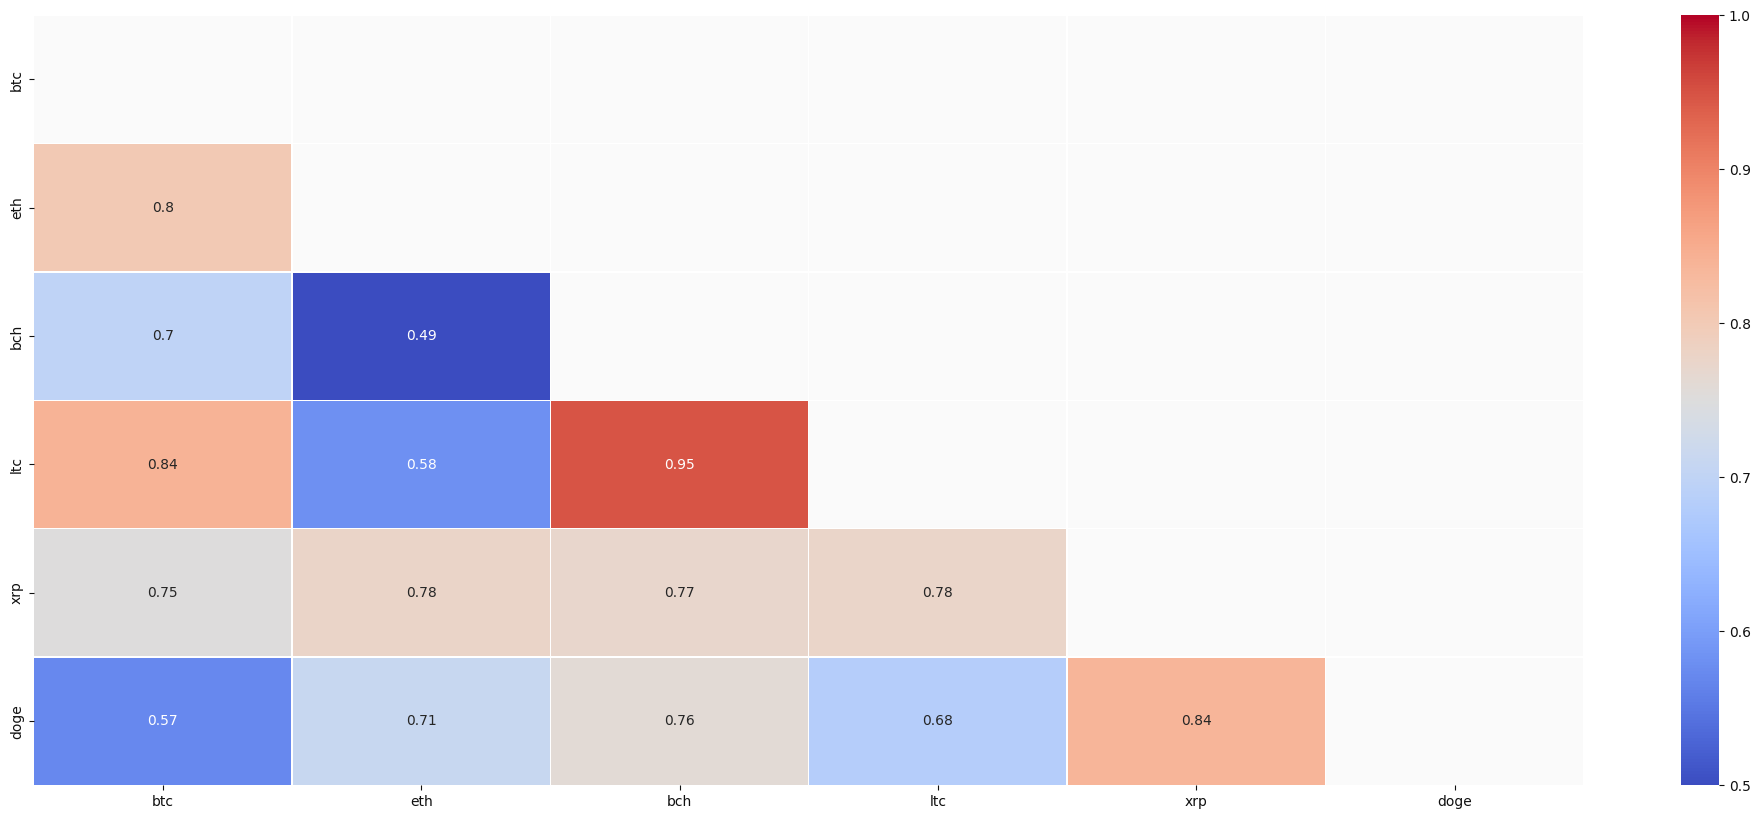

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# All variables
plt.figure(5, figsize=(25, 10))

mask = np.triu(np.ones_like(heat_corr_pearson, dtype=bool))

ax = sns.heatmap(heat_corr_pearson, mask=mask,
                 xticklabels=heat_corr_pearson.columns,
                 yticklabels=heat_corr_pearson.columns,
                 annot=True, linewidths=.2,
                 cmap='coolwarm',
                 vmin=0.5, vmax=1)